<a href="https://colab.research.google.com/github/E-Eshbaugh/CryptoModel_v1/blob/main/CryptoModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## -- 9/22/2025 --


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [31]:
# last 30 day BTC prices
btc = yf.download('BTC-USD', period='1y')
print(btc.info())

/tmp/ipython-input-3854787863.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download('BTC-USD', period='1y')
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2024-09-24 to 2025-09-24
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   366 non-null    float64
 1   (High, BTC-USD)    366 non-null    float64
 2   (Low, BTC-USD)     366 non-null    float64
 3   (Open, BTC-USD)    366 non-null    float64
 4   (Volume, BTC-USD)  366 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 17.2 KB
None


Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2024-09-30  63329.500000  65635.054688  62873.617188  65634.656250   
2024-10-01  60837.007812  64110.980469  60189.277344  63335.605469   
2024-10-02  60632.785156  62357.687500  59996.949219  60836.324219   
2024-10-03  60759.402344  61469.039062  59878.804688  60632.484375   
2024-10-04  62067.476562  62465.992188  60459.941406  60754.625000   

Price            Volume     7-Day_SMA  
Ticker          BTC-USD                
Date                                   
2024-09-30  37112957475  64752.750000  
2024-10-01  50220923500  64257.755580  
2024-10-02  40762722398  63899.132812  
2024-10-03  36106447279  63267.473214  
2024-10-04  29585472513  62735.589286  


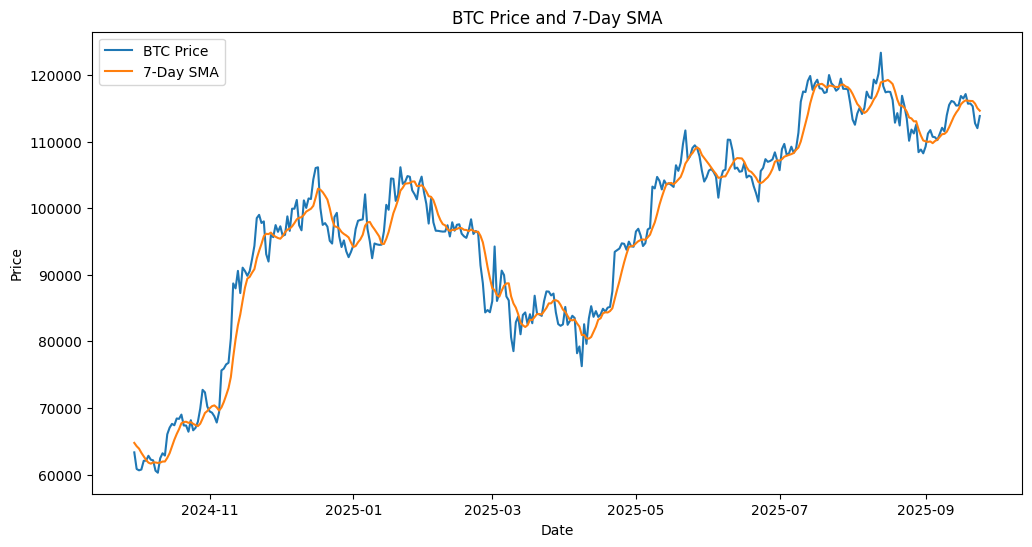

In [32]:
btc['7-Day_SMA'] = btc['Close'].rolling(window=7).mean()
btc = btc.dropna()
print(btc.head())

plot = plt.figure(figsize=(12, 6))
plt.plot(btc['Close'], label='BTC Price')
plt.plot(btc['7-Day_SMA'], label='7-Day SMA')
plt.title('BTC Price and 7-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## -- 9/24/2025 --


In [33]:
# Setting up column for price up (1) or down (0) on the next day.
btc['Next_Day_Movement'] = np.where(btc['Close'].shift(-1) > btc['Close'], 1, 0)
print(btc.head())

Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2024-09-30  63329.500000  65635.054688  62873.617188  65634.656250   
2024-10-01  60837.007812  64110.980469  60189.277344  63335.605469   
2024-10-02  60632.785156  62357.687500  59996.949219  60836.324219   
2024-10-03  60759.402344  61469.039062  59878.804688  60632.484375   
2024-10-04  62067.476562  62465.992188  60459.941406  60754.625000   

Price            Volume     7-Day_SMA Next_Day_Movement  
Ticker          BTC-USD                                  
Date                                                     
2024-09-30  37112957475  64752.750000                 0  
2024-10-01  50220923500  64257.755580                 0  
2024-10-02  40762722398  63899.132812                 1  
2024-10-03  36106447279  63267.473214                 1  
2024-10-04  29585472513  62735.58

In [34]:
# Adding 2-step RSI calculations

def calculate_rsi(prices, window=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

btc['RSI'] = calculate_rsi(btc['Close'])
btc = btc.dropna()
print(btc.head())

Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2024-10-13  62851.375000  63272.652344  62035.636719  63192.945312   
2024-10-14  66046.125000  66482.492188  62442.152344  62848.398438   
2024-10-15  67041.109375  67881.679688  64809.195312  66050.367188   
2024-10-16  67612.718750  68375.289062  66758.726562  67042.460938   
2024-10-17  67399.835938  67912.210938  66647.390625  67617.078125   

Price            Volume     7-Day_SMA Next_Day_Movement        RSI  
Ticker          BTC-USD                                             
Date                                                                
2024-10-13  18177529690  61959.245536                 1  47.763160  
2024-10-14  43706958056  62503.454799                 1  59.784521  
2024-10-15  48863870879  63204.760603                 1  75.047343  
2024-10-16  38195189534  

In [35]:
# Adding MACD measurements as well
# Going to keep the EMA calculations for 26, 12, and 9 period as well

btc['EMA_26'] = btc['Close'].ewm(span=26, adjust=False).mean()
btc['EMA_12'] = btc['Close'].ewm(span=12, adjust=False).mean()

btc['MACD'] = btc['EMA_12'] - btc['EMA_26']
btc['Signal_Line'] = btc['MACD'].ewm(span=9, adjust=False).mean()
btc = btc.dropna()
print(btc.head())

Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2024-10-13  62851.375000  63272.652344  62035.636719  63192.945312   
2024-10-14  66046.125000  66482.492188  62442.152344  62848.398438   
2024-10-15  67041.109375  67881.679688  64809.195312  66050.367188   
2024-10-16  67612.718750  68375.289062  66758.726562  67042.460938   
2024-10-17  67399.835938  67912.210938  66647.390625  67617.078125   

Price            Volume     7-Day_SMA Next_Day_Movement        RSI  \
Ticker          BTC-USD                                              
Date                                                                 
2024-10-13  18177529690  61959.245536                 1  47.763160   
2024-10-14  43706958056  62503.454799                 1  59.784521   
2024-10-15  48863870879  63204.760603                 1  75.047343   
2024-10-16  3819518

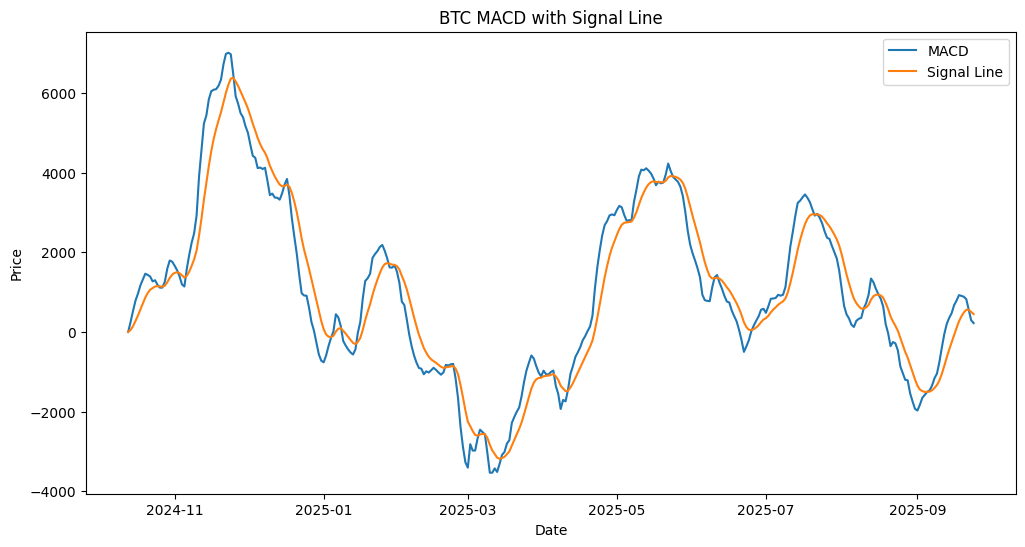

In [37]:
# Plot MACD (with signal line)

plot = plt.figure(figsize=(12, 6))
plt.plot(btc['MACD'], label='MACD')
plt.plot(btc['Signal_Line'], label='Signal Line')
plt.title('BTC MACD with Signal Line')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

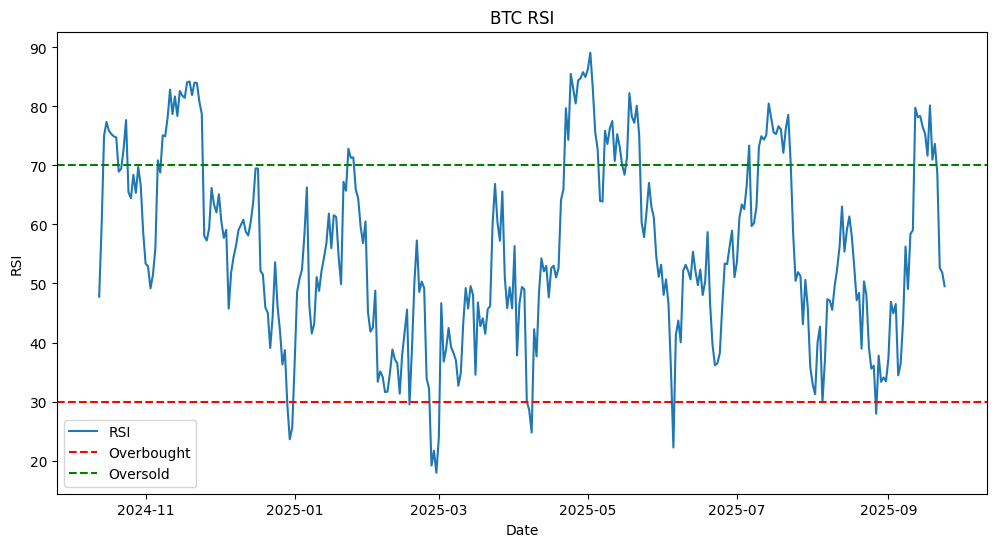

In [39]:
# Plot RSI

plot = plt.figure(figsize=(12, 6))
plt.plot(btc['RSI'], label='RSI')
plt.axhline(y=30, color='r', linestyle='--', label='Overbought')
plt.axhline(y=70, color='g', linestyle='--', label='Oversold')
plt.title('BTC RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()